# Time Series Analysis of Pennsylvania and Illinois Weather, Energy Consumption, and Flu Contagion (2013–2015)

## Introduction

In this project, we aim to identify and explore temporal patterns, correlations, and potential causal relationships between weather conditions, energy consumption, and flu contagion across Pennsylvania and Illinois from 2013 to 2015. By analyzing these interrelated datasets, we hope to derive insights that can inform stakeholders in public health and energy management.

### Objectives
- Analyze daily/hourly weather data to identify trends and seasonal patterns.
- Examine hourly energy consumption data to understand usage patterns in relation to weather.
- Investigate weekly flu contagion data to determine correlations with weather.
- Utilize statistical modeling techniques to assess interdependencies among the datasets.

### Key Datasets
1. **USA Weather Dataset (2013–2015)**:
   - Temporal granularity: Hourly
   - Variables of interest: Temperature.

2. **PJM Historic Energy Consumption**:
   - Temporal granularity: Hourly
   - Scope: Energy usage data for Pennsylvania (Duquesne Light) and Illinois (ComEd).

3. **Flu Contagion Dataset by State (2013–2015)**:
   - Temporal granularity: Weekly
   - Variables: Influenza-like illness (ILI) [activity](https://www.cdc.gov/mmwr/volumes/67/wr/mm6722a4.htm) in the USA.

This notebook will guide you through the data ingestion, preparation, exploratory data analysis (EDA), time series modeling, and visualization phases of the project.

In [1]:
# Data Manipulation and Analysis
import pandas as pd  # For data manipulation and analysis using DataFrames
import numpy as np   # For numerical operations and handling arrays

# Statistical Analysis
import scipy.stats as stats  # For statistical tests and distributions
from statsmodels.tsa.stattools import adfuller  # For stationarity tests

# Time Series Analysis
from statsmodels.tsa.arima.model import ARIMA  # For ARIMA modeling
from statsmodels.tsa.seasonal import seasonal_decompose  # For seasonal decomposition of time series

# Machine Learning Libraries
from sklearn.model_selection import train_test_split  # For splitting datasets into training and testing sets
from sklearn.ensemble import RandomForestRegressor  # For regression tasks
import xgboost as xgb  # For gradient boosting models

# Visualization Libraries
import matplotlib.pyplot as plt  # For creating static visualizations
import seaborn as sns            # For enhanced statistical visualizations
import plotly.express as px      # For interactive plots (optional)

# Date and Time Handling
from datetime import datetime     # For date/time manipulation
from pytz import timezone       # For time zone handling
import holidays                # For handling holidays


## Data Ingestion/Wrangling

We begin by retrieving the relevant dataframes for our job.

Weather dataset, granularity in hours. We are only interested in two states. This dataset is the one imposing the time dataframe in our study. As we are interested in its influence on energy consumption and flu activity, we isolate only the temperature (originally in Kelvin degrees).

Note: for this particular dataset we only have Pittsburgh and Chicago as representative cities for the states of Pennsylvania and Illinois respectivelly.

In [2]:
path = r'sources/historical_hourly_weather_data- 2012_to_2017/temperature.csv'
df = pd.read_csv(path)
display(df)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,NaN,282.000000,NaN,280.820000,293.550000,292.150000,289.540000,294.710000,285.720000,...,290.240000,NaN,275.130000,288.080000,NaN,NaN,NaN,NaN,NaN,NaN
45249,2017-11-29 21:00:00,NaN,282.890000,NaN,281.650000,295.680000,292.740000,290.610000,295.590000,286.450000,...,289.240000,NaN,274.130000,286.020000,NaN,NaN,NaN,NaN,NaN,NaN
45250,2017-11-29 22:00:00,NaN,283.390000,NaN,282.750000,295.960000,292.580000,291.340000,296.250000,286.440000,...,286.780000,NaN,273.480000,283.940000,NaN,NaN,NaN,NaN,NaN,NaN
45251,2017-11-29 23:00:00,NaN,283.020000,NaN,282.960000,295.650000,292.610000,292.150000,297.150000,286.140000,...,284.570000,NaN,272.480000,282.170000,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_temperature = df[['datetime', 'Pittsburgh', 'Chicago']].copy()

# export it as CSV
df_temperature.to_csv('raw_temperature.csv', index=False)

# change col names
df_temperature.columns = ['datetime', 'pittsburgh_temp', 'chicago_temp']

# change 'datetime' format
df_temperature['datetime'] = pd.to_datetime(df_temperature['datetime'])

# convert temperatures from K to C
df_temperature['pittsburgh_temp'] = df_temperature['pittsburgh_temp'] - 273.15
df_temperature['chicago_temp'] = df_temperature['chicago_temp'] - 273.15

display(df_temperature)

,datetime,pittsburgh_temp,chicago_temp
0,2012-10-01 12:00:00,NaN,NaN
1,2012-10-01 13:00:00,7.850000,10.860000
2,2012-10-01 14:00:00,7.874767,10.904691
3,2012-10-01 15:00:00,7.938319,11.027412
4,2012-10-01 16:00:00,8.001870,11.150133
...,...,...,...
45248,2017-11-29 20:00:00,12.150000,8.190000
45249,2017-11-29 21:00:00,12.180000,8.540000
45250,2017-11-29 22:00:00,9.760000,7.920000
45251,2017-11-29 23:00:00,6.990000,6.910000


In [4]:
# for completitude we count NaNs and duplicates
# the few NaNs will be absorbed later on the average
print(f'## df_temperature NaN values: \n{df_temperature.isna().sum()}\n')
print(f'## df_temperature dates duplicated values: {df_temperature['datetime'].duplicated().sum()}')

## df_temperature NaN values: 
datetime           0
pittsburgh_temp    3
chicago_temp       3
dtype: int64

## df_temperature dates duplicated values: 0


In [5]:
# check unique values in temperature dataframe
unique_years_temperature = df_temperature['datetime'].dt.year.unique()
print("## Unique years in temperature dataframe:", unique_years_temperature)

unique_months_temperature = df_temperature['datetime'].dt.month.unique()
print("## Unique months in temperature dataframe:", unique_months_temperature)

unique_days_temperature = df_temperature['datetime'].dt.day.unique()
print("## Unique days in temperature dataframe:", unique_days_temperature)

unique_hour_temperature = df_temperature['datetime'].dt.hour.unique()
print("## Unique hour in temperature dataframe:", unique_hour_temperature)

## Unique years in temperature dataframe: [2012 2013 2014 2015 2016 2017]
## Unique months in temperature dataframe: [10 11 12  1  2  3  4  5  6  7  8  9]
## Unique days in temperature dataframe: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
## Unique hour in temperature dataframe: [12 13 14 15 16 17 18 19 20 21 22 23  0  1  2  3  4  5  6  7  8  9 10 11]


### Energy Load Data Wrangling

For the electrical energy consumption by local statal companies, we have a dataset for Duquesne Light Co. (DUQ) and Commonwealth Edison (ComEd). The problem (for our analysis) is the interconnected energy distribution network: we have regional (not city) energy load:

**Duquesne Light Company** primarily provides electricity to southwestern Pennsylvania, specifically serving the greater Pittsburgh area and parts of Allegheny and Beaver counties. The utility serves approximately 600,000 customers across an 817 square mile service area, with about 90% of its service area being residential [[1]](https://www.electricchoice.com/utilities/duquesne-light/), [[2]](https://www.chooseenergy.com/utilities/duquesne-light-co-pa/), [[3]](https://electricityplans.com/pennsylvania/utilities/duquesne-light-company/).

**Commonwealth Edison (ComEd)** is the largest electric utility in Illinois, serving more than 4,000,000 customers across northern Illinois, which represents approximately 70% of the state's population. The company's service territory covers about 11,400 square miles, stretching from the Wisconsin border to the north, Iowa border to the west, Indiana border to the east, and as far south as Iroquois County. ComEd, a unit of Exelon Corporation, manages over 90,000 miles of power lines and has been providing electric service to the region for more than 100 years [[4]](https://www.exeloncorp.com/companies/comed), [[5]](https://www.ilcma.org/friends-of-ilcma/comed/), [[6]](https://en.wikipedia.org/wiki/Commonwealth_Edison).

To bridge the connection between weather and energy datasets, we can hypothesize that state-level temperature trends are closely aligned with the temperature variations observed in their primary metropolitan areas. This assumption allows us to use city temperature data as a reliable proxy for regional weather conditions, facilitating more granular analysis of energy consumption patterns in relation to temperature fluctuations.

In [6]:
# import energy datasets
path1 = r'sources\hourly_energy_consumption\DUQ_hourly.csv'
path2 = r'sources\hourly_energy_consumption\COMED_hourly.csv'
df_pennsylvania = pd.read_csv(path1)
df_illinois = pd.read_csv(path2)

# check df structure
display(df_pennsylvania.head())
print()
display(df_illinois.head())

,Datetime,DUQ_MW
0,2005-12-31 01:00:00,1458.0
1,2005-12-31 02:00:00,1377.0
2,2005-12-31 03:00:00,1351.0
3,2005-12-31 04:00:00,1336.0
4,2005-12-31 05:00:00,1356.0


,Datetime,COMED_MW
0,2011-12-31 01:00:00,9970.0
1,2011-12-31 02:00:00,9428.0
2,2011-12-31 03:00:00,9059.0
3,2011-12-31 04:00:00,8817.0
4,2011-12-31 05:00:00,8743.0


Although [Pennsylvania](https://www.macrotrends.net/global-metrics/states/pennsylvania/population) and [Illinois](https://www.macrotrends.net/global-metrics/states/illinois/population) have similar populations, there is a magnitude order in energy load.

| Year | Pennsylvania | Illinois    |
|------|--------------|-------------|
| 2012 | 12,763,536   | 12,875,280  |
| 2013 | 12,773,801   | 12,882,250  |
| 2014 | 12,787,209   | 12,880,552  |
| 2015 | 12,802,503   | 12,859,585  |
| 2016 | 12,784,227   | 12,821,709  |
| 2017 | 12,805,537   | 12,779,893  |


So to normalize the electric energy load, we will need to divide by the amount of clients of each company:

In [7]:
# manipulate energy datasets
df_pennsylvania_pop = df_pennsylvania.copy()
df_pennsylvania_pop['Duquesne_kW'] = df_pennsylvania_pop['DUQ_MW'] / 600 # divide by customers and convert to kW
df_pennsylvania_pop.drop(columns='DUQ_MW', inplace=True)
display(df_pennsylvania_pop)
print()

df_illinois_pop = df_illinois.copy()
df_illinois_pop['ComEdison_kW'] = df_illinois_pop['COMED_MW'] / 4000 # divide by customers and convert to kW
df_illinois_pop.drop(columns='COMED_MW', inplace=True)
display(df_illinois_pop)

,Datetime,Duquesne_kW
0,2005-12-31 01:00:00,2.430000
1,2005-12-31 02:00:00,2.295000
2,2005-12-31 03:00:00,2.251667
3,2005-12-31 04:00:00,2.226667
4,2005-12-31 05:00:00,2.260000
...,...,...
119063,2018-01-01 20:00:00,3.270000
119064,2018-01-01 21:00:00,3.233333
119065,2018-01-01 22:00:00,3.151667
119066,2018-01-01 23:00:00,3.033333


,Datetime,ComEdison_kW
0,2011-12-31 01:00:00,2.49250
1,2011-12-31 02:00:00,2.35700
2,2011-12-31 03:00:00,2.26475
3,2011-12-31 04:00:00,2.20425
4,2011-12-31 05:00:00,2.18575
...,...,...
66492,2018-01-01 20:00:00,3.46450
66493,2018-01-01 21:00:00,3.43950
66494,2018-01-01 22:00:00,3.40675
66495,2018-01-01 23:00:00,3.33400


There are some duplicated values, much possible due to summer time:

In [8]:
# check missing values
print(f'## Pensylvania missing values: \n{df_pennsylvania_pop.isna().sum()}')
print()
print(f'## Illinois missing values: \n{df_illinois_pop.isna().sum()}')
print()

# check duplicates
print(f'## Pensylvania duplicated values: \n{df_pennsylvania_pop['Datetime'].duplicated().sum()}')
print()
print(f'## Illinois duplicated values: \n{df_illinois_pop['Datetime'].duplicated().sum()}')

## Pensylvania missing values: 
Datetime       0
Duquesne_kW    0
dtype: int64

## Illinois missing values: 
Datetime        0
ComEdison_kW    0
dtype: int64

## Pensylvania duplicated values: 
4

## Illinois duplicated values: 
4


In [9]:
# remove duplicates
df_pennsylvania_pop = df_pennsylvania_pop.drop_duplicates(subset='Datetime')
df_illinois_pop = df_illinois_pop.drop_duplicates(subset='Datetime')

# check duplicates
print(f'## Pensylvania duplicated values: \n{df_pennsylvania_pop['Datetime'].duplicated().sum()}')
print()
print(f'## Illinois duplicated values: \n{df_illinois_pop['Datetime'].duplicated().sum()}')

## Pensylvania duplicated values: 
0

## Illinois duplicated values: 
0


In [10]:
# ensure 'Datetime' is in datetime format
df_pennsylvania_pop['Datetime'] = pd.to_datetime(df_pennsylvania_pop['Datetime'])
df_illinois_pop['Datetime'] = pd.to_datetime(df_illinois_pop['Datetime'])

# check unique years in Pennsylvania dataframe
unique_years_pennsylvania = df_pennsylvania_pop['Datetime'].dt.year.unique()
print("## Unique years in Pennsylvania dataframe:", unique_years_pennsylvania)

# check unique years in Illinois dataframe
unique_years_illinois = df_illinois_pop['Datetime'].dt.year.unique()
print("## Unique years in Illinois dataframe:", unique_years_illinois)

## Unique years in Pennsylvania dataframe: [2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]
## Unique years in Illinois dataframe: [2011 2012 2013 2014 2015 2016 2017 2018]


We need only the time period specified by the weather data. We achieve that with a left inner join on the temperature dataset:

In [11]:
# merge temp and duqesne
df_energy = pd.merge(df_temperature, df_pennsylvania_pop, left_on='datetime', right_on='Datetime', how='inner')
df_energy.drop(columns='Datetime', inplace=True)

# merge with common edison
df_energy = pd.merge(df_energy, df_illinois_pop, left_on='datetime', right_on='Datetime', how='inner')
df_energy.drop(columns='Datetime', inplace=True)

# check shape
display(df_energy)
display(f'## Shape of df_temperature:{df_temperature.shape}')
display(f'## Shape of df_energy:{df_energy.shape}')

# check missin values
print(f'## df_energy missing values: \n{df_energy.isna().sum()}')

,datetime,pittsburgh_temp,chicago_temp,Duquesne_kW,ComEdison_kW
0,2012-10-01 12:00:00,NaN,NaN,2.716667,2.82550
1,2012-10-01 13:00:00,7.850000,10.860000,2.733333,2.85650
2,2012-10-01 14:00:00,7.874767,10.904691,2.745000,2.88050
3,2012-10-01 15:00:00,7.938319,11.027412,2.716667,2.89350
4,2012-10-01 16:00:00,8.001870,11.150133,2.711667,2.87225
...,...,...,...,...,...
45241,2017-11-29 20:00:00,12.150000,8.190000,2.690000,3.04275
45242,2017-11-29 21:00:00,12.180000,8.540000,2.676667,2.99950
45243,2017-11-29 22:00:00,9.760000,7.920000,2.591667,2.92025
45244,2017-11-29 23:00:00,6.990000,6.910000,2.461667,2.78700


'## Shape of df_temperature:(45253, 3)'

'## Shape of df_energy:(45246, 5)'

## df_energy missing values: 
datetime           0
pittsburgh_temp    3
chicago_temp       3
Duquesne_kW        0
ComEdison_kW       0
dtype: int64


After performing an intersection on the temperature datetime, the number of rows was reduced by 7 due to the use of daylight saving time. And is the same reason why we have 3 missing temperature values (the original ones from df_temperature, that we'll deal with them later). 

This would imply a 1 hour phase shift on the modeling during daylight saving time. To address that we will flag the daylight saving time period.

Finally for this dataset we flag the daylight saving time (DST) days, as also for non working days (NWD). Note that Illinois and Pennsylvania share the same time zone.

In [12]:
# define US holidays
us_holidays = holidays.US()

# define pittsburgh/illinois timezone
pittsburgh_tz = timezone("America/New_York")

# define a function to check for DST with error handling
# the error handling is due the missing timestamps for DST
def check_dst(dt):
    try:
        return 1 if pittsburgh_tz.localize(dt).dst() else 0
    except Exception:
        return np.nan  # Return NaN if there is an error
    
# add is_DST column using the defined function
df_energy["is_DST"] = df_energy["datetime"].apply(check_dst)

# add is_NWD column
df_energy["is_NWD"] = df_energy["datetime"].apply(
    lambda x: 1 if x.weekday() >= 5 or x in us_holidays else 0
)

df_energy.to_csv('df_energy.csv', index=False)

Note: Instead of simply flagging DST, it is much better to offset the 'datetime' column. For that we should know how is the offset related to df_temperature['datetime'], but we don't know.

### Flu Data Wrangling

Flu dataset, pay attention to its granularity in weeks. The relationship between the weather dataset and flu activity dataset is not straight forward and need grouping.

![alt text](<erd diagram.png>)

We begin by extracting only the relevant states:

In [13]:
# import the data
path = r'sources\fluview\StateDatabySeason55_54,53,52,57,56.csv'
df = pd.read_csv(path)
display(df)

,STATENAME,URL,WEBSITE,ACTIVITY LEVEL,ACTIVITY LEVEL LABEL,WEEKEND,WEEK,SEASON
0,Alabama,http://adph.org/influenza/,Influenza Surveillance,Level 1,Minimal,Jun-10-2017,23,2016-17
1,Alabama,http://adph.org/influenza/,Influenza Surveillance,Level 10,High,Mar-25-2017,12,2016-17
2,Alabama,http://adph.org/influenza/,Influenza Surveillance,Level 9,High,Apr-01-2017,13,2016-17
3,Alabama,http://adph.org/influenza/,Influenza Surveillance,Level 4,Low,Apr-08-2017,14,2016-17
4,Alabama,http://adph.org/influenza/,Influenza Surveillance,Level 3,Minimal,Apr-15-2017,15,2016-17
...,...,...,...,...,...,...,...,...
16826,New York City,http://www1.nyc.gov/site/doh/providers/health-...,Surveillance Data,Level 8,High,Dec-22-2012,51,2012-13
16827,New York City,http://www1.nyc.gov/site/doh/providers/health-...,Surveillance Data,Level 1,Minimal,Oct-26-2013,43,2013-14
16828,New York City,http://www1.nyc.gov/site/doh/providers/health-...,Surveillance Data,Level 1,Minimal,Oct-19-2013,42,2013-14
16829,New York City,http://www1.nyc.gov/site/doh/providers/health-...,Surveillance Data,Level 1,Minimal,Oct-12-2013,41,2013-14


In [14]:
# take only the relevant states
df_flu = df[(df['STATENAME'] == 'Pennsylvania') | (df['STATENAME'] == 'Illinois')].copy()
display(df_flu)
df_flu.to_csv('raw_flu.csv', index=False)

,STATENAME,URL,WEBSITE,ACTIVITY LEVEL,ACTIVITY LEVEL LABEL,WEEKEND,WEEK,SEASON
4057,Illinois,http://www.dph.illinois.gov/topics-services/di...,Seasonal Influenza Surveillance Reports,Level 10,High,Dec-23-2017,51,2017-18
4058,Illinois,http://www.dph.illinois.gov/topics-services/di...,Seasonal Influenza Surveillance Reports,Level 6,Moderate,Dec-16-2017,50,2017-18
4059,Illinois,http://www.dph.illinois.gov/topics-services/di...,Seasonal Influenza Surveillance Reports,Level 3,Minimal,Dec-09-2017,49,2017-18
4060,Illinois,http://www.dph.illinois.gov/topics-services/di...,Seasonal Influenza Surveillance Reports,Level 3,Minimal,Dec-02-2017,48,2017-18
4061,Illinois,http://www.dph.illinois.gov/topics-services/di...,Seasonal Influenza Surveillance Reports,Level 1,Minimal,Nov-25-2017,47,2017-18
...,...,...,...,...,...,...,...,...
12188,Pennsylvania,https://www.health.pa.gov/topics/disease/Flu/P...,Influenza Weekly Report,Level 1,Minimal,Jul-15-2017,28,2016-17
12189,Pennsylvania,https://www.health.pa.gov/topics/disease/Flu/P...,Influenza Weekly Report,Level 1,Minimal,Jul-22-2017,29,2016-17
12190,Pennsylvania,https://www.health.pa.gov/topics/disease/Flu/P...,Influenza Weekly Report,Level 1,Minimal,May-06-2017,18,2016-17
12191,Pennsylvania,https://www.health.pa.gov/topics/disease/Flu/P...,Influenza Weekly Report,Level 1,Minimal,May-13-2017,19,2016-17


In [15]:
# convert 'ACTIVITY LEVEL' to numeric values
df_flu['ACTIVITY LEVEL'] = df_flu['ACTIVITY LEVEL'].str.replace('Level ', '').astype(int)

# remove unnecessary cols
df_flu.drop(columns=['URL', 'WEBSITE'], inplace=True)

# convert WEEKEND to datetime type
df_flu['WEEKEND'] = pd.to_datetime(df_flu['WEEKEND'])

# check for missing values and duplicates
print(f'## df_flu missing values: \n{df_flu.isna().sum()}\n')
print(f'## df_flu duplicated values: {df_flu.duplicated().sum()}')

## df_flu missing values: 
STATENAME               0
ACTIVITY LEVEL          0
ACTIVITY LEVEL LABEL    0
WEEKEND                 0
WEEK                    0
SEASON                  0
dtype: int64

## df_flu duplicated values: 0


In [16]:
# separate illinois and sort by date
df_illinois = df_flu[df_flu['STATENAME']=='Illinois'].copy()
df_illinois.drop(columns='STATENAME', inplace=True)
df_illinois.sort_values(by='WEEKEND', inplace=True)
df_illinois.reset_index(drop=True, inplace=True)

# separate pennsylvania and sort by date
df_pennsylvania = df_flu[df_flu['STATENAME']=='Pennsylvania'].copy()
df_pennsylvania.drop(columns='STATENAME', inplace=True)
df_pennsylvania.sort_values(by='WEEKEND', inplace=True)
df_pennsylvania.reset_index(drop=True, inplace=True)

# rename cols
df_illinois.columns = ['illinois_AL', 'illinois_AL_label', 'illinois_weekend', 'illinois_week', 'illinois_season']
df_pennsylvania.columns = ['pennsylvania_AL', 'pennsylvania_AL_label', 'pennsylvania_weekend', 'pennsylvania_week', 'pennsylvania_season']

# export as CSV
df_illinois.to_csv('raw_flu_illinois.csv', index=False)
df_pennsylvania.to_csv('raw_flu_pennsylvania.csv', index=False)

display(df_illinois)
display(df_pennsylvania)

,illinois_AL,illinois_AL_label,illinois_weekend,illinois_week,illinois_season
0,1,Minimal,2012-10-06,40,2012-13
1,1,Minimal,2012-10-13,41,2012-13
2,1,Minimal,2012-10-20,42,2012-13
3,1,Minimal,2012-10-27,43,2012-13
4,2,Minimal,2012-11-03,44,2012-13
...,...,...,...,...,...
308,1,Minimal,2018-09-01,35,2017-18
309,1,Minimal,2018-09-08,36,2017-18
310,1,Minimal,2018-09-15,37,2017-18
311,1,Minimal,2018-09-22,38,2017-18


,pennsylvania_AL,pennsylvania_AL_label,pennsylvania_weekend,pennsylvania_week,pennsylvania_season
0,1,Minimal,2012-10-06,40,2012-13
1,1,Minimal,2012-10-13,41,2012-13
2,1,Minimal,2012-10-20,42,2012-13
3,1,Minimal,2012-10-27,43,2012-13
4,1,Minimal,2012-11-03,44,2012-13
...,...,...,...,...,...
308,1,Minimal,2018-09-01,35,2017-18
309,1,Minimal,2018-09-08,36,2017-18
310,1,Minimal,2018-09-15,37,2017-18
311,1,Minimal,2018-09-22,38,2017-18


Now we need to make this dataset compatible with the temperature one. As an approach, we can assume the flu activity level in a state is similar to the one in its mayor cities.

We proceed then to add a 'week' column in the temperature dataset.

In [17]:
df_temperature['week'] = df_temperature['datetime'].dt.isocalendar().week
df_temperature['year'] = df_temperature['datetime'].dt.year
display(df_temperature.head())

,datetime,pittsburgh_temp,chicago_temp,week,year
0,2012-10-01 12:00:00,NaN,NaN,40,2012
1,2012-10-01 13:00:00,7.850000,10.860000,40,2012
2,2012-10-01 14:00:00,7.874767,10.904691,40,2012
3,2012-10-01 15:00:00,7.938319,11.027412,40,2012
4,2012-10-01 16:00:00,8.001870,11.150133,40,2012


We add two more columns for each city, based on the temperature

In [18]:
# define temperature thresholds
cold_threshold = 10
hot_threshold = 25

# flag cold and hot hours
df_temperature['pittsburgh_cold'] = (df_temperature['pittsburgh_temp'] < cold_threshold).astype(int)
df_temperature['pittsburgh_hot'] = (df_temperature['pittsburgh_temp'] > hot_threshold).astype(int)
df_temperature['chicago_cold'] = (df_temperature['chicago_temp'] < cold_threshold).astype(int)
df_temperature['chicago_hot'] = (df_temperature['chicago_temp'] > hot_threshold).astype(int)

df_temperature

,datetime,pittsburgh_temp,chicago_temp,week,year,pittsburgh_cold,pittsburgh_hot,chicago_cold,chicago_hot
0,2012-10-01 12:00:00,NaN,NaN,40,2012,0,0,0,0
1,2012-10-01 13:00:00,7.850000,10.860000,40,2012,1,0,0,0
2,2012-10-01 14:00:00,7.874767,10.904691,40,2012,1,0,0,0
3,2012-10-01 15:00:00,7.938319,11.027412,40,2012,1,0,0,0
4,2012-10-01 16:00:00,8.001870,11.150133,40,2012,1,0,0,0
...,...,...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,12.150000,8.190000,48,2017,0,0,1,0
45249,2017-11-29 21:00:00,12.180000,8.540000,48,2017,0,0,1,0
45250,2017-11-29 22:00:00,9.760000,7.920000,48,2017,1,0,1,0
45251,2017-11-29 23:00:00,6.990000,6.910000,48,2017,1,0,1,0


At the moment of grouping by week, we need to keep as much as possible details:

In [19]:
# group by year then by week and create aggregated fields
df_temperature_week = df_temperature.groupby(['year', 'week']).agg(
    pittsburgh_temp_mean=('pittsburgh_temp', 'mean'),
    pittsburgh_temp_min=('pittsburgh_temp', 'min'),
    pittsburgh_temp_max=('pittsburgh_temp', 'max'),
    pittsburgh_cold_hours=('pittsburgh_cold', 'sum'),
    pittsburgh_hot_hours=('pittsburgh_hot', 'sum'),
    chicago_temp_mean=('chicago_temp', 'mean'),
    chicago_temp_min=('chicago_temp', 'min'),
    chicago_temp_max=('chicago_temp', 'max'),
    chicago_cold_hours=('chicago_cold', 'sum'),
    chicago_hot_hours=('chicago_hot', 'sum')
).reset_index()

# sort again by year then by week
df_temperature_week.sort_values(by=['year', 'week'], inplace=True)

display(df_temperature_week)

,year,week,pittsburgh_temp_mean,pittsburgh_temp_min,pittsburgh_temp_max,pittsburgh_cold_hours,pittsburgh_hot_hours,chicago_temp_mean,chicago_temp_min,chicago_temp_max,chicago_cold_hours,chicago_hot_hours
0,2012,1,-2.636458,-4.25,-0.92,24,0,-4.743125,-9.21,0.55,24,0
1,2012,40,15.869417,7.85,23.35,33,0,13.345701,1.77,25.47,42,1
2,2012,41,7.644464,0.02,18.15,120,0,9.236339,1.37,18.76,103,0
3,2012,42,12.760982,3.75,24.14,63,0,11.990923,4.77,20.76,75,0
4,2012,43,15.353095,3.30,27.65,35,6,13.710238,2.20,25.85,59,4
...,...,...,...,...,...,...,...,...,...,...,...,...
268,2017,45,3.104989,-8.49,20.42,147,0,1.827507,-7.41,10.36,165,0
269,2017,46,4.363480,-2.67,14.89,159,0,3.943264,-1.32,10.50,166,0
270,2017,47,3.785714,-5.68,12.72,149,0,3.727202,-5.72,16.61,150,0
271,2017,48,7.726260,0.86,17.56,44,0,8.255342,-0.81,16.39,41,0


Although the first and last row's week wern't calculated in a correct way, the others did so

In [20]:
# remove first and last rows
df_temperature_week.drop(index=0, inplace=True)
df_temperature_week.drop(index=df_temperature_week.index[-1], inplace=True)
df_temperature_week.reset_index(drop=True, inplace=True)
print(f'## the grouped dataframe shape is {df_temperature_week.shape}')

## the grouped dataframe shape is (271, 12)


The new grouped dataset is rather small. We proceed to merge both datasets as we did for energy load

In [21]:
# merge df_temperature_week with illinois by year then by week
df_illinois_flu = pd.merge(df_temperature_week, df_illinois, 
                   left_on=['year', 'week'], 
                   right_on=[df_illinois['illinois_weekend'].dt.year, 'illinois_week'], 
                   how='inner')

# drop unnecessary cols
df_illinois_flu.drop(columns=['illinois_weekend', 'illinois_week', 'pittsburgh_temp_mean', 
                              'pittsburgh_temp_min', 'pittsburgh_temp_max',
                              'pittsburgh_cold_hours', 'pittsburgh_hot_hours'], inplace=True)

# rename cols for better readability
df_illinois_flu.columns = ['year', 'week', 'temp_mean', 'temp_min', 'temp_max', 
                           'cold_hours', 'hot_hours', 'activity_level', 
                           'activity_level_label', 'season']

df_illinois_flu

,year,week,temp_mean,temp_min,temp_max,cold_hours,hot_hours,activity_level,activity_level_label,season
0,2012,40,13.345701,1.77,25.47,42,1,1,Minimal,2012-13
1,2012,41,9.236339,1.37,18.76,103,0,1,Minimal,2012-13
2,2012,42,11.990923,4.77,20.76,75,0,1,Minimal,2012-13
3,2012,43,13.710238,2.20,25.85,59,4,1,Minimal,2012-13
4,2012,44,5.937470,1.51,11.45,163,0,2,Minimal,2012-13
...,...,...,...,...,...,...,...,...,...,...
265,2017,44,6.588274,1.54,10.90,147,0,1,Minimal,2017-18
266,2017,45,1.827507,-7.41,10.36,165,0,1,Minimal,2017-18
267,2017,46,3.943264,-1.32,10.50,166,0,1,Minimal,2017-18
268,2017,47,3.727202,-5.72,16.61,150,0,1,Minimal,2017-18


In [22]:
# merge df_temperature_week with pittsburgh by year then by week
df_pennsylvania_flu = pd.merge(df_temperature_week, df_pennsylvania,
                                 left_on=['year', 'week'],
                                 right_on=[df_pennsylvania['pennsylvania_weekend'].dt.year, 'pennsylvania_week'],
                                 how='inner')

# drop unnecessary cols
df_pennsylvania_flu.drop(columns=['pennsylvania_weekend', 'pennsylvania_week', 'chicago_temp_mean', 
                                  'chicago_temp_min', 'chicago_temp_max',
                                  'chicago_cold_hours', 'chicago_hot_hours'], inplace=True)

# rename cols for better readability
df_pennsylvania_flu.columns = ['year', 'week', 'temp_mean', 'temp_min', 'temp_max', 
                           'cold_hours', 'hot_hours', 'activity_level', 
                           'activity_level_label', 'season']

df_pennsylvania_flu

,year,week,temp_mean,temp_min,temp_max,cold_hours,hot_hours,activity_level,activity_level_label,season
0,2012,40,15.869417,7.85,23.35,33,0,1,Minimal,2012-13
1,2012,41,7.644464,0.02,18.15,120,0,1,Minimal,2012-13
2,2012,42,12.760982,3.75,24.14,63,0,1,Minimal,2012-13
3,2012,43,15.353095,3.30,27.65,35,6,1,Minimal,2012-13
4,2012,44,4.696369,1.98,8.36,168,0,1,Minimal,2012-13
...,...,...,...,...,...,...,...,...,...,...
265,2017,44,9.127143,-0.37,21.04,92,0,2,Minimal,2017-18
266,2017,45,3.104989,-8.49,20.42,147,0,2,Minimal,2017-18
267,2017,46,4.363480,-2.67,14.89,159,0,2,Minimal,2017-18
268,2017,47,3.785714,-5.68,12.72,149,0,2,Minimal,2017-18


## EDA

### Temperature Dataset

We start by making the temperature dataset more comfortable to work with

In [42]:
# first we prepare the date to make it more suitable for the EDA
df_temperature_pittsburgh = df_temperature[['datetime', 'pittsburgh_temp', 'pittsburgh_cold', 'pittsburgh_hot', 'year', 'week']].copy()
df_temperature_chicago = df_temperature[['datetime', 'chicago_temp', 'chicago_cold', 'chicago_hot', 'year', 'week']].copy()

# pittsburgh dataset
df_temperature_pittsburgh['month'] = df_temperature_pittsburgh['datetime'].dt.month
df_temperature_pittsburgh['day'] = df_temperature_pittsburgh['datetime'].dt.dayofyear
df_temperature_pittsburgh['hour'] = df_temperature_pittsburgh['datetime'].dt.hour
df_temperature_pittsburgh.set_index('datetime', inplace=True)

# chicago dataset
df_temperature_chicago['month'] = df_temperature_chicago['datetime'].dt.month
df_temperature_chicago['day'] = df_temperature_chicago['datetime'].dt.dayofyear
df_temperature_chicago['hour'] = df_temperature_chicago['datetime'].dt.hour
df_temperature_chicago.set_index('datetime', inplace=True)

Now we observe the data, already knowing that seasonality is a 3 month period and day-night is a 24 hs period.

In [43]:
# calculate seasonal average (3 month span)
df_temperature_pittsburgh['seasonal_avg'] = df_temperature_pittsburgh['pittsburgh_temp'].rolling(window='90D').mean()
df_temperature_chicago['seasonal_avg'] = df_temperature_chicago['chicago_temp'].rolling(window='90D').mean()

# calculate weekly average
df_temperature_pittsburgh['week_avg'] = df_temperature_pittsburgh['pittsburgh_temp'].rolling(window='7D').mean()
df_temperature_chicago['week_avg'] = df_temperature_chicago['chicago_temp'].rolling(window='7D').mean()

# calculate daily average (24 hour span)
df_temperature_pittsburgh['day_avg'] = df_temperature_pittsburgh['pittsburgh_temp'].rolling(window='24h').mean()
df_temperature_chicago['day_avg'] = df_temperature_chicago['chicago_temp'].rolling(window='24h').mean()

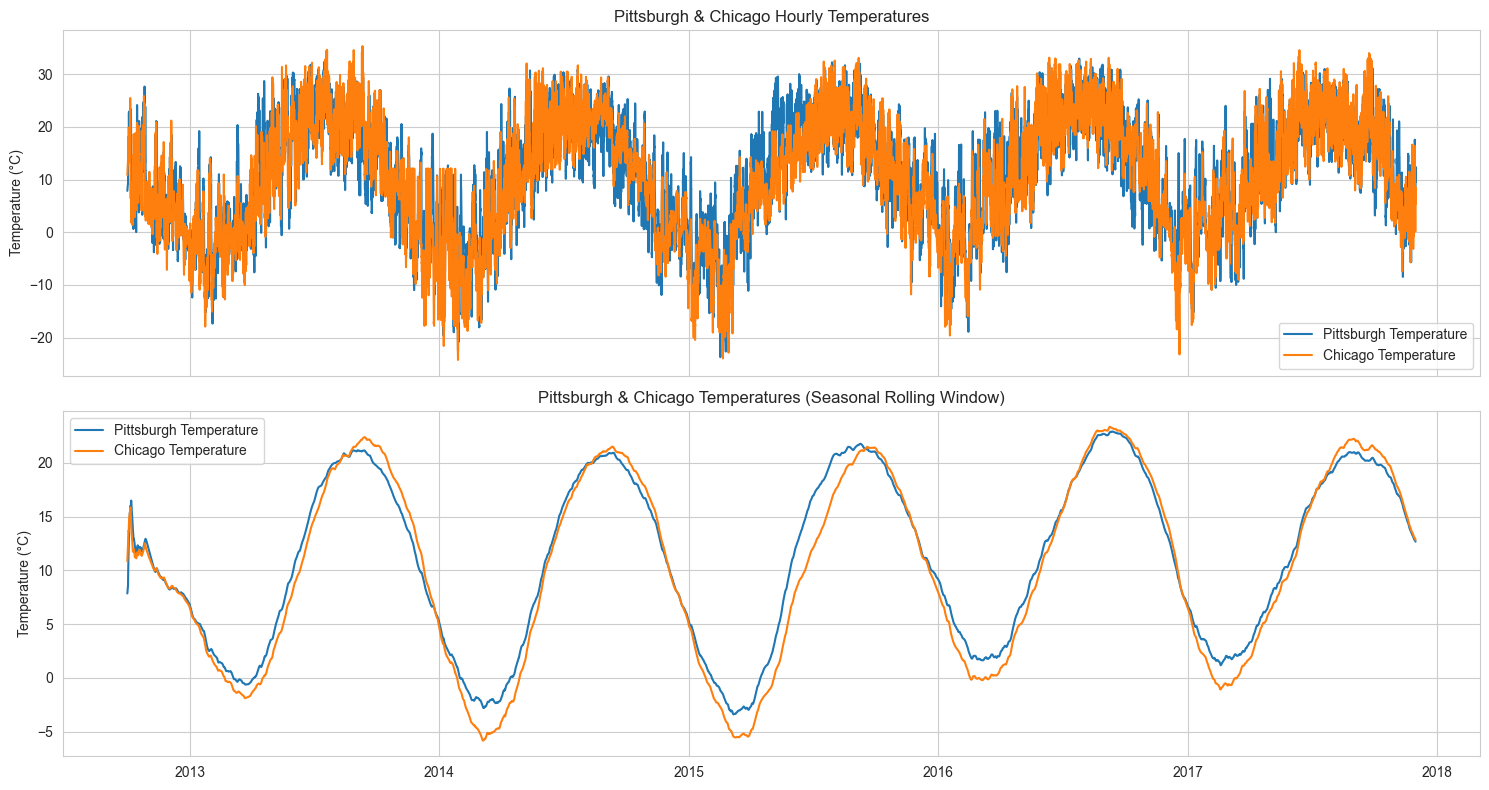

In [ ]:
# general season patterns
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8), sharex=True)

# plot raw temperatures
sns.lineplot(data=df_temperature_pittsburgh, x='datetime', y='pittsburgh_temp', label='Pittsburgh Temperature', ax=ax1)
sns.lineplot(data=df_temperature_chicago, x='datetime', y='chicago_temp', label='Chicago Temperature', ax=ax1)
ax1.set_title('Pittsburgh & Chicago Hourly Temperatures')
ax1.set_xlabel('') # redundant
ax1.set_ylabel('Temperature (°C)')

# plot seasonal moving avg
sns.lineplot(data=df_temperature_pittsburgh, x='datetime', y='seasonal_avg', label='Pittsburgh Temperature', ax=ax2)
sns.lineplot(data=df_temperature_chicago, x='datetime', y='seasonal_avg', label='Chicago Temperature', ax=ax2)
ax2.set_title('Pittsburgh & Chicago Temperatures (Seasonal Rolling Window)')
ax2.set_xlabel('') # redundant
ax2.set_ylabel('Temperature (°C)')

# adjust layout and show plot
plt.tight_layout()
plt.show()

By applying a 3-month rolling average, we capture general seasonal trends. We observe that for the time span of our datasets, Chicago's winters are about 2°C colder than Pittsburgh's. Additionally, we notice [the seasonal lag](https://earthsky.org/earth/why-isnt-the-longest-day-of-the-year-the-hottest-day/) of approximately one month. This phase shift is due to thermal inertia, the coldest and hottest days do not occur on the solstices.

Additionally, in this plot we can capture general trends and say for example the Chicago's 2013 summer was hotter than Pittsburgh's one.